In [100]:
import numpy as np
import pandas as pd

import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

In [129]:
%matplotlib inline
rcParams["figure.figsize"]= 15,15
plt.style.use("seaborn-whitegrid")

In [128]:
from sklearn.datasets import load_diabetes
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Cleaning 0

In [103]:
zero_not_accepted = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] =  df[column].replace(np.NaN, mean)

# Split data

In [104]:
#split data
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.2)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Cross-Validation

In [114]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=8)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores.mean())

0.7474747474747474


# Grid Search

In [117]:
#tuning the hyperparameter
#grid search
from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

KNeighborsClassifier(n_neighbors=8)

In [122]:
#Classfier K-nearest models
classifier = KNeighborsClassifier(n_neighbors=, p=2, metric = "euclidean")
#fit
classifier.fit(X_train, y_train) 
#Predict
y_pred = classifier.predict(X_test)
print((y_pred==y_test.values).sum())
print(y_test.size)


119
154


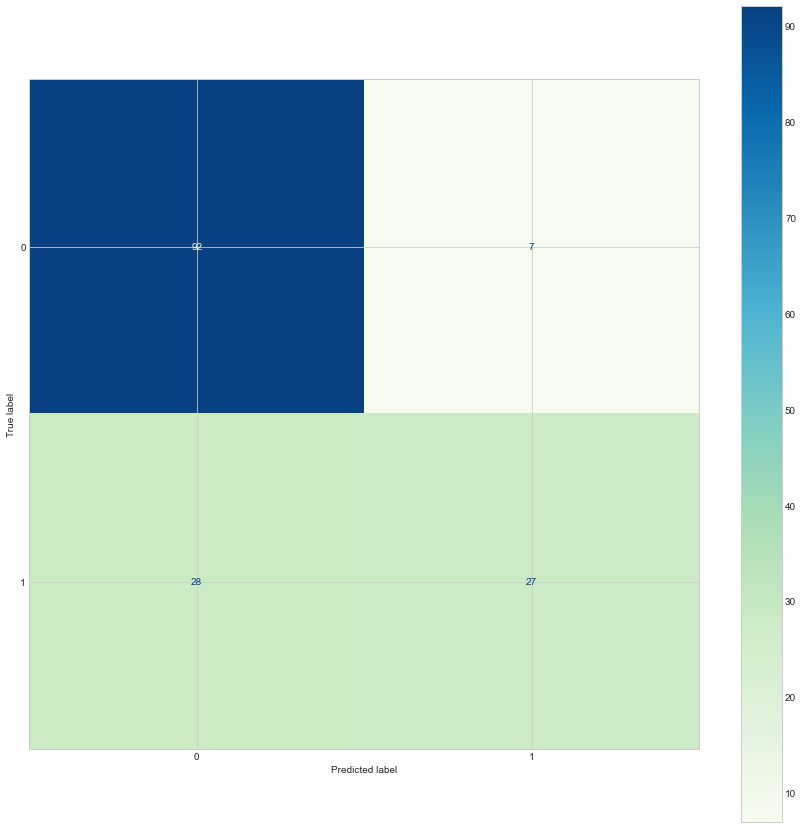

In [130]:
#evaluation the model with matrics
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.GnBu)

In [131]:
f1_score(y_test, y_pred)

0.6067415730337079

In [134]:
accuracy_score(y_test, y_pred)

0.7727272727272727